In [1]:
# import the neccsessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import os
os.environ["OMP_NUM_THREADS"] = "1"


In [2]:
# Read the data from CSV file into a Pandas DataFrame
df = pd.read_csv("Customer Purchasing Behaviors.csv")


In [3]:
# display the first five rows
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [4]:
# check for dupicate values
df.duplicated().sum()

0

In [5]:
# drop the irrelevant columns
df.drop(columns= ['user_id', 'region'],inplace=True)

In [6]:
# check the dataset
df.shape

(238, 5)

In [7]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 238 non-null    int64  
 1   annual_income       238 non-null    int64  
 2   purchase_amount     238 non-null    int64  
 3   loyalty_score       238 non-null    float64
 4   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 9.4 KB


In [8]:
# Get the descriptive statistics
df.describe()

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,38.676471,57407.563025,425.630252,6.794118,19.798319
std,9.351118,11403.875717,140.052062,1.899047,4.562884
min,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,46.750000,66750.000000,527.500000,8.275000,23.000000
max,55.000000,75000.000000,640.000000,9.500000,28.000000


In [9]:
# check for null values
df.isnull().sum()

age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
purchase_frequency    0
dtype: int64

In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_df = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
X = pd.DataFrame(scaled_df, columns=df.columns)

In [11]:
X.head()

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
0,-1.465632,-1.090306,-1.614441,-1.210582,-1.712679
1,-0.501151,-0.211563,-0.541153,0.108642,-0.394950
2,0.677658,0.667180,0.532134,0.636332,0.483536
3,-1.787125,-2.408420,-1.972203,-2.002117,-2.151922
4,-1.036974,-0.914557,-1.471336,-1.052275,-1.493057


<Axes: >

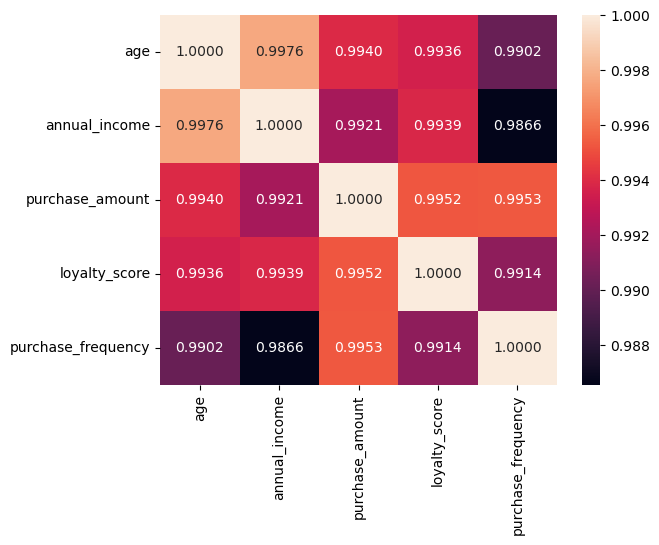

In [12]:
corr_matrix = X.corr(method = 'spearman')
sns.heatmap(data=corr_matrix, annot=True, fmt='0.04f')

In [13]:
px.scatter(data_frame = X, y = 'age', x = 'purchase_frequency',
                width = 600)

## Clustering using K- means

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

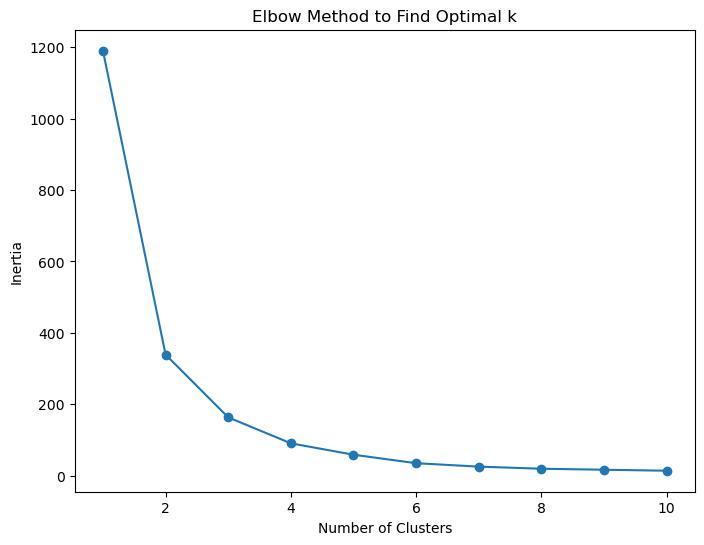

In [14]:
# Finding the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):  # Check k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances to centroids

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
model = KMeans(n_clusters=3,n_init='auto',random_state=23) # initialize the K-Means 
model.fit(X) # fit the model to the dataset 
predictions = model.predict(X) # Assign each data point in X to a cluster

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [16]:
# Getting the cluster centers (centroids)
centroids = model.cluster_centers_
print(centroids)


[[-1.21505581 -1.25830076 -1.29771578 -1.32232837 -1.28312477]
 [ 1.2639102   1.14790407  1.18136782  1.13298088  1.15531982]
 [-0.03256959  0.07359779  0.07756531  0.12623166  0.0852033 ]]


In [17]:

X['Cluster'] = predictions
X.head()  # Display the first few rows with the assigned cluster labels


,age,annual_income,purchase_amount,loyalty_score,purchase_frequency,Cluster
0,-1.465632,-1.090306,-1.614441,-1.210582,-1.712679,0
1,-0.501151,-0.211563,-0.541153,0.108642,-0.394950,2
2,0.677658,0.667180,0.532134,0.636332,0.483536,2
3,-1.787125,-2.408420,-1.972203,-2.002117,-2.151922,0
4,-1.036974,-0.914557,-1.471336,-1.052275,-1.493057,0


In [18]:
X.head(30)

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency,Cluster
0,-1.465632,-1.090306,-1.614441,-1.210582,-1.712679,0
1,-0.501151,-0.211563,-0.541153,0.108642,-0.394950,2
2,0.677658,0.667180,0.532134,0.636332,0.483536,2
3,-1.787125,-2.408420,-1.972203,-2.002117,-2.151922,0
4,-1.036974,-0.914557,-1.471336,-1.052275,-1.493057,0
5,0.249000,0.315683,0.389029,0.530794,0.263915,2
6,-0.286823,-0.299437,-0.183391,-0.155203,-0.175328,2
7,-1.251303,-1.266054,-1.399783,-1.368889,-1.273436,0
8,1.213480,1.106551,1.247659,1.164021,1.142401,1
9,-0.822645,-0.650934,-0.755811,-0.682893,-0.614571,0


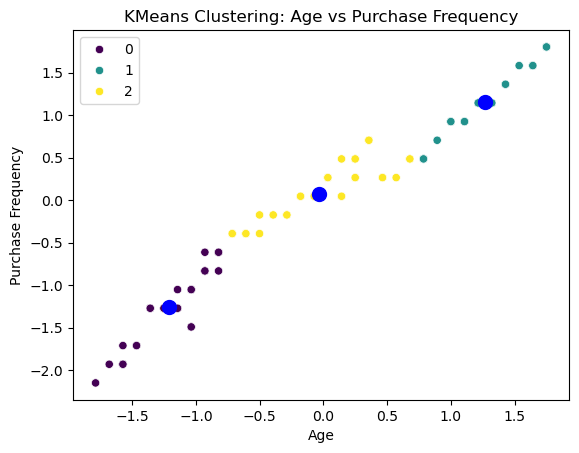

In [20]:


# Plot the scatter plot with clusters colored by 'predictions' (the cluster labels)
sns.scatterplot(data=X, x='age', y='purchase_frequency', hue=predictions, palette='viridis')

# Extract the centroids from the KMeans model
centroid_x = model.cluster_centers_[:, 0]  
centroid_y = model.cluster_centers_[:, 1]  

# Plot the centroids using blue circles ('ob' stands for blue 'o' markers)
plt.plot(centroid_x, centroid_y, 'ob', markersize=10)  # 'ob' means blue circles

# Add a title and labels
plt.title('KMeans Clustering: Age vs Purchase Frequency')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')

# Display the plot
plt.show()


In [21]:
px.scatter(data_frame=X, x = 'age', y = 'annual_income',
           width = 600,color = predictions)

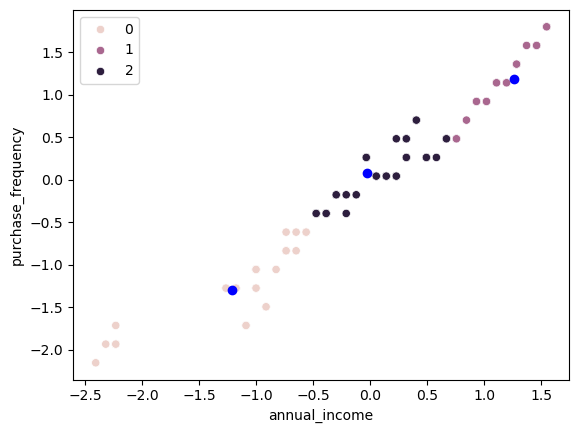

In [22]:
sns.scatterplot(data=X, x = 'annual_income', y = 'purchase_frequency', hue=predictions)
centroid_x , centroid_y = model.cluster_centers_[:,0],model.cluster_centers_[:,2]
plt.plot(centroid_x, centroid_y, 'ob')

In [23]:

px.scatter_3d(data_frame = X, x='loyalty_score', y = 'annual_income',
              z = 'purchase_frequency', width = 600, color = predictions)

In [24]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X.drop(columns=['Cluster']), X['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5635883076778309


In [25]:
# Calculate the mean values of each cluster
X['Cluster'] = model.labels_
cluster_summary = X.groupby('Cluster').mean()
print(cluster_summary)

              age  annual_income  purchase_amount  loyalty_score  \
Cluster                                                            
0       -1.215056      -1.258301        -1.297716      -1.322328   
1        1.263910       1.147904         1.181368       1.132981   
2       -0.032570       0.073598         0.077565       0.126232   

         purchase_frequency  
Cluster                      
0                 -1.283125  
1                  1.155320  
2                  0.085203  



<b>

 Cluster 0 

Represents low-income customers who also have low spending habits and loyalty scores.

Cluster 1 

Indicates high-income customers who are more loyal and spend more frequently.

Cluster 2 

Represents a balanced group that does not strongly lean towards high or low spending.<b/>
